In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
with open("/kaggle/input/kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.

duration: continuous.

protocol_type: symbolic.

service: symbolic.

flag: symbolic.

src_bytes: continuous.

dst_bytes: continuous.

land: symbolic.

wrong_fragment: continuous.

urgent: continuous.

hot: continuous.

num_failed_logins: continuous.

logged_in: symbolic.

num_compromised: continuous.

root_shell: continuous.

su_attempted: continuous.

num_root: continuous.

num_file_creations: continuous.

num_shells: continuous.

num_access_files: continuous.

num_outbound_cmds: continuous.

is_host_login: symbolic.

is_guest_login: symbolic.

count: continuous.

srv_count: continuous.

serror_rate: continuous.

srv_serror_rate: continuous.

rerror_rate: continuous.

srv_rerror_rate: continuous.

same_srv_rate: continuous.

diff_srv_rate: continuous.

srv_diff_host_rate: continuous.

dst_host_count: con

In [3]:
cols="""duration,
protocol_type,
service,
flag,
src_bytes,
dst_bytes,
land,
wrong_fragment,
urgent,
hot,
num_failed_logins,
logged_in,
num_compromised,
root_shell,
su_attempted,
num_root,
num_file_creations,
num_shells,
num_access_files,
num_outbound_cmds,
is_host_login,
is_guest_login,
count,
srv_count,
serror_rate,
srv_serror_rate,
rerror_rate,
srv_rerror_rate,
same_srv_rate,
diff_srv_rate,
srv_diff_host_rate,
dst_host_count,
dst_host_srv_count,
dst_host_same_srv_rate,
dst_host_diff_srv_rate,
dst_host_same_src_port_rate,
dst_host_srv_diff_host_rate,
dst_host_serror_rate,
dst_host_srv_serror_rate,
dst_host_rerror_rate,
dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())

columns.append('target')
print(columns)
print(len(columns))

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']

42


In [4]:
with open("/home/deedash/NetSecProject/attack_types",'r') as f:
    print(f.read())

back dos

buffer_overflow u2r

ftp_write r2l

guess_passwd r2l

imap r2l

ipsweep probe

land dos

loadmodule u2r

multihop r2l

neptune dos

nmap probe

perl u2r

phf r2l

pod dos

portsweep probe

rootkit u2r

satan probe

smurf dos

spy r2l

teardrop dos

warezclient r2l

warezmaster r2l


In [5]:
attacks_types = {
    'normal': 'normal',
'back': 'dos',
'buffer_overflow': 'u2r',
'ftp_write': 'r2l',
'guess_passwd': 'r2l',
'imap': 'r2l',
'ipsweep': 'probe',
'land': 'dos',
'loadmodule': 'u2r',
'multihop': 'r2l',
'neptune': 'dos',
'nmap': 'probe',
'perl': 'u2r',
'phf': 'r2l',
'pod': 'dos',
'portsweep': 'probe',
'rootkit': 'u2r',
'satan': 'probe',
'smurf': 'dos',
'spy': 'r2l',
'teardrop': 'dos',
'warezclient': 'r2l',
'warezmaster': 'r2l',
}


In [6]:
path = "/home/deedash/NetSecProject/kddcup.data_10_percent.gz"
df = pd.read_csv(path,names=columns)

df['Attack Type'] = df.target.apply(lambda r:attacks_types[r[:-1]])

df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [7]:
df.shape

(494021, 43)

In [8]:
df['target'].value_counts()

smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: target, dtype: int64

In [9]:
df['Attack Type'].value_counts()

dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: Attack Type, dtype: int64

In [10]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [11]:
df.isnull().sum()

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [12]:
#Finding categorical features
num_cols = df._get_numeric_data().columns

cate_cols = list(set(df.columns)-set(num_cols))
cate_cols.remove('target')
cate_cols.remove('Attack Type')

cate_cols

['protocol_type', 'flag', 'service']

In [13]:
#Visualization
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")

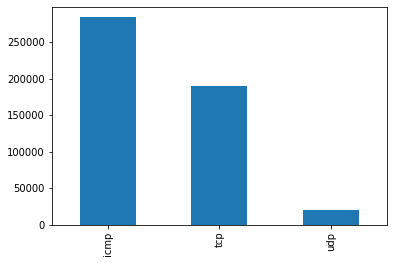

In [14]:
bar_graph('protocol_type')

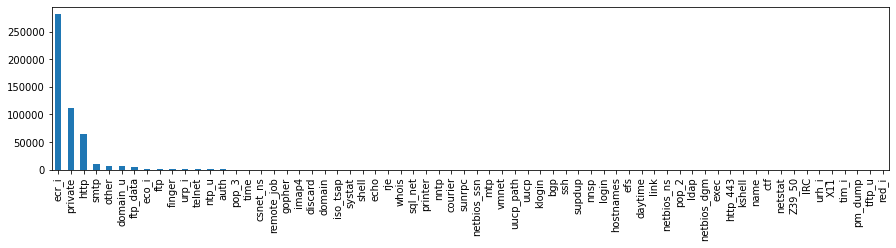

In [15]:
plt.figure(figsize=(15,3))
bar_graph('service')

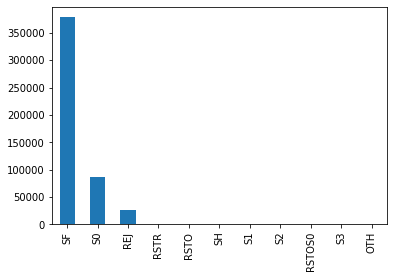

In [16]:
bar_graph('flag')

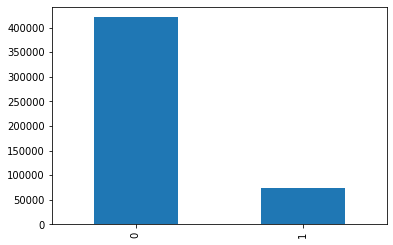

In [17]:
bar_graph('logged_in')

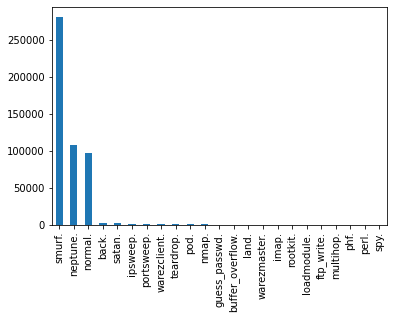

In [18]:
bar_graph('target')

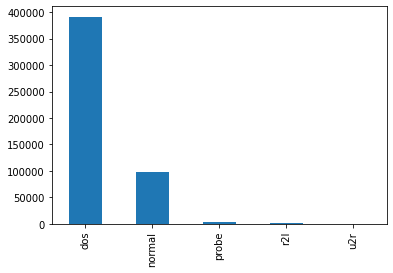

In [19]:
bar_graph('Attack Type')

In [20]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

/tmp/ipykernel_11230/2265167443.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.

  df = df.dropna('columns')


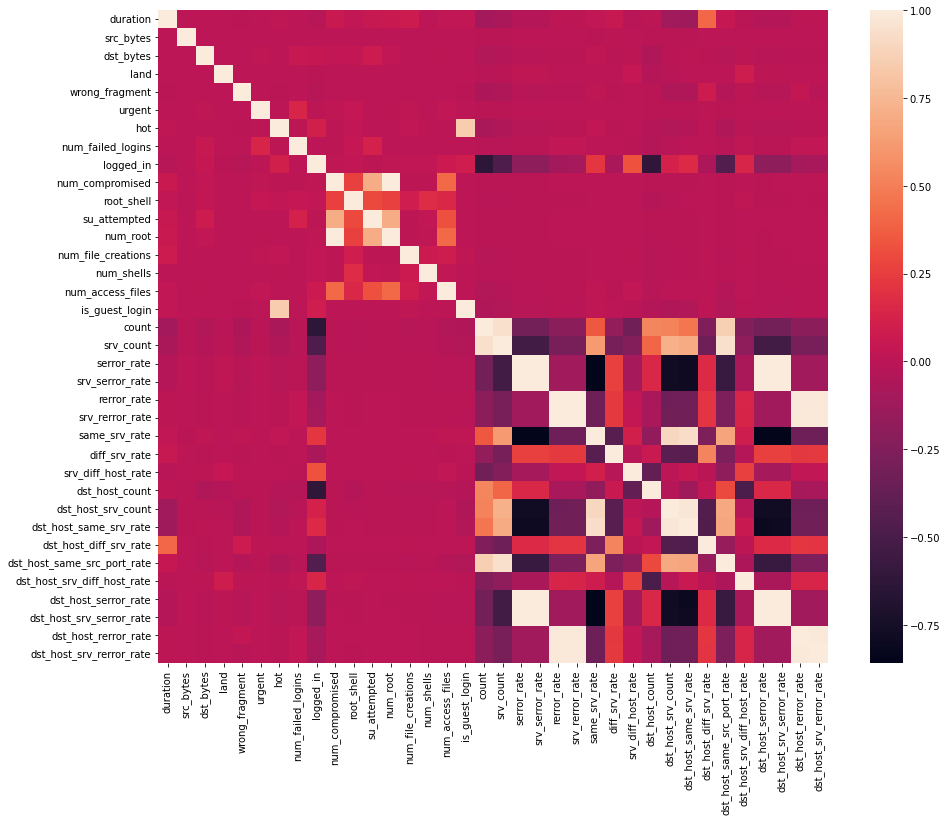

In [21]:
df = df.dropna('columns')

df = df[[col for col in df if df[col].nunique() > 1]]

corr = df.corr()

plt.figure(figsize=(15,12))

sns.heatmap(corr)

plt.show()

In [22]:
df['num_root'].corr(df['num_compromised'])

0.9938277978855621

In [23]:
df['srv_serror_rate'].corr(df['serror_rate'])

0.9983615072774075

In [24]:
df['srv_count'].corr(df['count'])

0.9436670688859888

In [25]:
df['srv_rerror_rate'].corr(df['rerror_rate'])

0.9947309539768959

In [26]:
df['dst_host_same_srv_rate'].corr(df['dst_host_srv_count'])

0.973685457288797

In [27]:
df['dst_host_srv_serror_rate'].corr(df['dst_host_serror_rate'])

0.9981559173419928

In [28]:
df['dst_host_srv_rerror_rate'].corr(df['dst_host_rerror_rate'])

0.9848038371118153

In [29]:
df['dst_host_same_srv_rate'].corr(df['same_srv_rate'])

0.9278080342622356

In [30]:
df['dst_host_srv_count'].corr(df['same_srv_rate'])

0.8989546630296196

In [31]:
df['dst_host_same_src_port_rate'].corr(df['srv_count'])

0.9449263676728097

In [32]:
df['dst_host_serror_rate'].corr(df['serror_rate'])

0.998672968005985

In [33]:
df['dst_host_serror_rate'].corr(df['srv_serror_rate'])

0.997835300382868

In [34]:
df['dst_host_srv_serror_rate'].corr(df['serror_rate'])

0.9978492485717189

In [35]:
df['dst_host_srv_serror_rate'].corr(df['srv_serror_rate'])

0.9993041091814795

In [36]:
df['dst_host_rerror_rate'].corr(df['rerror_rate'])

0.9869947924930162

In [37]:
df['dst_host_rerror_rate'].corr(df['srv_rerror_rate'])

0.9821663427327707

In [38]:
df['dst_host_srv_rerror_rate'].corr(df['rerror_rate'])

0.9851995540727149

In [39]:
df['dst_host_srv_rerror_rate'].corr(df['srv_rerror_rate'])

0.9865705438800483

In [40]:
df.drop('num_root',axis = 1,inplace = True)

df.drop('srv_serror_rate',axis = 1,inplace = True)

df.drop('srv_rerror_rate',axis = 1, inplace=True)

df.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)

df.drop('dst_host_serror_rate',axis = 1, inplace=True)

df.drop('dst_host_rerror_rate',axis = 1, inplace=True)

df.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)

df.drop('dst_host_same_srv_rate',axis = 1, inplace=True)

In [41]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [42]:
df.shape

(494021, 33)

In [43]:
df.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_file_creations', 'num_shells', 'num_access_files',
       'is_guest_login', 'count', 'srv_count', 'serror_rate', 'rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_diff_srv_rate',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'target',
       'Attack Type'],
      dtype='object')

In [44]:
df_std = df.std()
df_std = df_std.sort_values(ascending = True)
df_std

/tmp/ipykernel_11230/1261043509.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

  df_std = df.std()


urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

In [45]:
df['protocol_type'].value_counts()

icmp    283602
tcp     190065
udp      20354
Name: protocol_type, dtype: int64

In [46]:
pmap = {'icmp':0,'tcp':1,'udp':2}
df['protocol_type'] = df['protocol_type'].map(pmap)

In [47]:
df['flag'].value_counts()

SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: flag, dtype: int64

In [48]:
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
df['flag'] = df['flag'].map(fmap)

In [49]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,http,0,239,486,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,http,0,235,1337,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,http,0,219,1337,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,http,0,217,2032,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [50]:
df.drop('service',axis = 1,inplace= True)

In [51]:
df.shape

(494021, 32)

In [52]:
df.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,...,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,target,Attack Type
0,0,1,0,181,5450,0,0,0,0,0,...,1.0,0.0,0.0,9,9,0.0,0.11,0.0,normal.,normal
1,0,1,0,239,486,0,0,0,0,0,...,1.0,0.0,0.0,19,19,0.0,0.05,0.0,normal.,normal
2,0,1,0,235,1337,0,0,0,0,0,...,1.0,0.0,0.0,29,29,0.0,0.03,0.0,normal.,normal
3,0,1,0,219,1337,0,0,0,0,0,...,1.0,0.0,0.0,39,39,0.0,0.03,0.0,normal.,normal
4,0,1,0,217,2032,0,0,0,0,0,...,1.0,0.0,0.0,49,49,0.0,0.02,0.0,normal.,normal


In [53]:
df.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
diff_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count           

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [55]:
df = df.drop(['target',], axis=1)
print(df.shape)

Y = df[['Attack Type']]
X = df.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(494021, 31)

(330994, 30) (163027, 30)

(330994, 1) (163027, 1)


GAUSSIAN NAIVE BAYES

In [56]:
from sklearn.naive_bayes import GaussianNB

In [57]:
model1 = GaussianNB()

In [58]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [59]:
print("Training time: ",end_time-start_time)

Training time:  0.9059512615203857


In [60]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()

In [61]:
print("Testing time: ", end_time-start_time)

Testing time:  0.25504112243652344


In [62]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8795114110829804

Test score is: 0.8790384414851528


DECISION TREE

In [63]:
from sklearn.tree import DecisionTreeClassifier

In [64]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [65]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [66]:
print("Training time: ",end_time-start_time)

Training time:  1.5914483070373535


In [67]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()

In [68]:
print("Testing time: ",end_time-start_time)

Testing time:  0.026651859283447266


In [69]:
print("Train score is:", model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9905829108684749

Test score is: 0.9905230421954646


RANDOM FOREST

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
model3 = RandomForestClassifier(n_estimators=30)

In [72]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [73]:
print("Training time: ",end_time-start_time)

Training time:  10.687421083450317


In [74]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()

In [75]:
print("Testing time: ",end_time-start_time)

Testing time:  0.6355631351470947


In [76]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.9999728091747887

Test score is: 0.9996810344298798


SUPPORT VECTOR MACHINE

In [77]:
from sklearn.svm import SVC

In [78]:
model4 = SVC(gamma = 'scale')

In [79]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [80]:
print("Training time: ",end_time-start_time)

Training time:  214.3988482952118


In [81]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()

In [82]:
print("Testing time: ",end_time-start_time)

Testing time:  98.3910117149353


In [83]:
print("Train score is:", model4.score(X_train, Y_train))
print("Test score is:", model4.score(X_test,Y_test))

Train score is: 0.9987552644458811

Test score is: 0.9987916112055059


LOGISTIC REGRESSION

In [84]:
from sklearn.linear_model import LogisticRegression

In [85]:
model5 = LogisticRegression(max_iter=1200000)

In [86]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()

In [87]:
print("Training time: ",end_time-start_time)

Training time:  86.94573068618774


In [88]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()

In [89]:
print("Testing time: ",end_time-start_time)

Testing time:  0.049623727798461914


In [90]:
print("Train score is:", model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))

Train score is: 0.9935285835997028

Test score is: 0.9935286792985211


TRAINING ACCURACY

<BarContainer object of 5 artists>

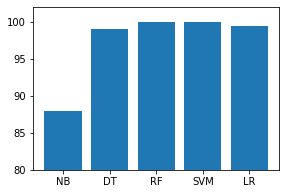

In [91]:
names = ['NB','DT','RF','SVM','LR']
values = [87.95114110829804,99.05829108684749,99.997583037759,99.87552644458811,99.35285835997028]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [92]:
f.savefig('training_accuracy_figure.png',bbox_inches='tight')

TESTING ACCURACY

<BarContainer object of 5 artists>

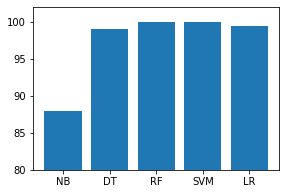

In [93]:
names = ['NB','DT','RF','SVM','LR']
values = [87.90384414851528,99.05230421954646,99.96442307102504,99.87916112055059,99.352]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [94]:
f.savefig('test_accuracy_figure.png',bbox_inches='tight')

TRAINING TIME

<BarContainer object of 5 artists>

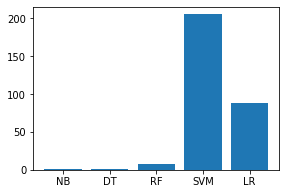

In [95]:
names = ['NB','DT','RF','SVM','LR']
values = [0.7789855003356934,1.4306437969207764,8.040992021560669,205.14626240730286,87.66213941574097]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [96]:
f.savefig('train_time_figure.png',bbox_inches='tight')

TESTING TIME

<BarContainer object of 5 artists>

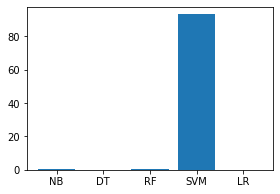

In [97]:
names = ['NB','DT','RF','SVM','LR']
values = [0.28055238723754883,0.018643617630004883,0.6131908893585205,93.14738893508911,0.05386018753051758]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.bar(names,values)

In [98]:
f.savefig('test_time_figure.png',bbox_inches='tight')